# Este código nos permitirá realizar análisis de sentimiento sobre una base de datos de tweets recogidos en la localidad de Murcia España
https://www.pybonacci.org/2015/11/24/como-hacer-analisis-de-sentimiento-en-espanol-2/

In [35]:
import pandas as pd
pd.set_option('max_colwidth',1000)

Cargamos la base de datos de TASS, con tweets catálogados que nos permitirá hacer el entrenamiento de algoritmos de machine learning, estos tienen una polaridad asignada para cada tweet.

In [36]:
general_tweets_corpus_train = pd.read_csv('general-tweets-train-tagged.csv', encoding='utf-8')
social_tweets_corpus_train = pd.read_csv('socialtv-tweets-train-tagged.csv', encoding='utf-8')
stompol_tweets_train_tagged = pd.read_csv('stompol-tweets-train-tagged.csv', encoding='utf-8')
#tweet_testeo = pd.read_csv('tweet_test.csv', encoding='utf-8')

In [37]:
general_tweets_corpus_train.head()

,content,polarity,agreement
0,"Salgo de #VeoTV , que día más largoooooo...",NONE,AGREEMENT
1,@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias,NEU,DISAGREEMENT
2,@marodriguezb Gracias MAR,P,AGREEMENT
3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N+,AGREEMENT
4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P+,AGREEMENT


In [38]:
social_tweets_corpus_train.head()

,content,polarity,agreement
0,Los que esta noche van a la redonda a celebrar la victoria del Real Madrid les espero para cuando suba el @realmurciacfsad a primera.,P,
1,Diooooos que careron de gareth madreeeeee ahí están los jugadores importantes decidiendo partidos vamos coñoooooooo jajaja hala madrid,P,
2,Ganó el mejor. @realmadrid #CopaRelRey #FinalCopaRelRey,P,
3,@realmadrid Felicidades!!! ? Gracias por alegrarme la tarde!!! ??? *Aplausos* #Feliz,P,
4,@titelas Mañana Bale en naranja,NEU,


In [39]:
stompol_tweets_train_tagged.head()

,content,polarity,agreement
0,Diga cuanto nos van a costar las autovías de sus amiguetes ¿4500 millones o más ? @EsperanzAguirre @PPopular,N,
1,@lhermoso_ @sanchezcastejon #DobleMoral Castilla antes que Aragón...,N,
2,@PSOE @sanchezcastejon Me hace mucha gracia que esa afirmación la haga el PSOE,N,
3,Para que todo el mundo lo tengo claro .... @CsAlzira_ https://t.co/kcDxbhu3Ha,NEU,
4,@Albert_Rivera y @CiudadanosCs saben q este país es progresista pero q se arruga y vota centro. Discurso moderado y electoralista.,N,


Concatenamos los Tweets cargados anteriormente en un solo Corpus

In [40]:
tweets_corpus = pd.concat([
        general_tweets_corpus_train,
        social_tweets_corpus_train,
        stompol_tweets_train_tagged,
        #tweet_testeo,
    ])
tweets_corpus.sample(5)

,content,polarity,agreement
3912,El envalentonamiento de nuestro extremo centro les lleva a respaldar el linchamiento a Garzón con argumentos democráticos.,NEU,DISAGREEMENT
4087,"Ademas , que sentido tiene que desde el gobierno andaluz imponga una subasta de medicamentos cuando no tienen competencia en ello?",N,AGREEMENT
2306,El lunes toma posesión la nueva abogada general del Estado y otros altos cargos en el Ministerio de Justicia http://t.co/4u6n5AOU,NONE,AGREEMENT
5945,En el ecuador de la campaña #25M: Gracias por el esfuerzo que tod@s estáis haciendo. Somos el partido de la calle y las propuestas.,P+,AGREEMENT
444,""" @sanchezcastejon: Tras apoyar a nuestros candidatos en Ourense, de camino a la Feria del Libro en Ponferrada"" a montarse en la noria",NEU,


Filtramos tweets en desacuerdo y sin polaridad y removemos los tweets que son solo hipervinculos

In [41]:
tweets_corpus = tweets_corpus.query('agreement != "DISAGREEMENT" and polarity != "NONE"')
tweets_corpus = tweets_corpus[-tweets_corpus.content.str.contains('^http.*$')]

In [42]:
tweets_corpus.size  #tamaño vector entrenamiento

22650

In [43]:
tweets_corpus.sample(10)

,content,polarity,agreement
1087,"Yo sigo en shock con el carrerón de Bale , pero hala Madrid y eso...",P,
102,Parados q votan al @PPopular q tios + grandes!!!,N,
6997,@Amartinbeaumont crees q puede aplicarse in modelo de gobierno tecnocrata en España? Existe ese riesgo?,N,AGREEMENT
306,Vosotros sabeis cuanto le pagaran a Ronaldo por llevar la gorra?,NEU,
1623,"Busquets , me la chupas ?",N,
5757,Un abrazo padre de Anais. ;) RT @AnaisCardoso91: @AlejandroSanz Le puedes mandar un saludo a mi padre que ... http://t.co/pqeixKv3,P,AGREEMENT
6946,Yo tambien me acuerdo. ;) RT @atrejom: RT @ROSS_RIV: @atrejom te acuerdas del concierto gratis de @AlejandroSanz ... http://t.co/hLjoRIMV,P,AGREEMENT
897,Todos ladrando de que va ganando el real pero cuando los empato el barça no decian ni madres .|.,N,
1561,"Que grande @SergioRamos , a ver si da unos buenos capotazos para celebrarlo en honor a Raúl .",P,
4406,Aznar como siempre poniendo deberes a Rajoy: reformas ya y ni un movimiento ante ETA. #congresopp,N,AGREEMENT


Seguiremos con el proceso de Tokenizar y stemming

Primero descargaremos las stopwords

In [44]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jromanf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Luego cargaremos las stopwords en español

In [45]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

In [46]:
from string import punctuation
non_words = list(punctuation)
#we add spanish punctuation
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

Creamos a continuación las funciones para token y stemm

In [47]:
#Funcion token, stem
from sklearn.feature_extraction.text import CountVectorizer       
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


stemmer = SnowballStemmer('spanish')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = ''.join([c for c in text if c not in non_words])
    # tokenize
    tokens =  word_tokenize(text)

    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


Vamos a evaluar el modelo con los tweets que tienen una polaridad diferente a la neutral

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

tweets_corpus = tweets_corpus[tweets_corpus.polarity != 'NEU']

tweets_corpus['polarity_bin'] = 0
tweets_corpus.polarity_bin[tweets_corpus.polarity.isin(['P', 'P+'])] = 1
tweets_corpus.polarity_bin.value_counts(normalize=True)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    0.548709
0    0.451291
Name: polarity_bin, dtype: float64

In [49]:
tweets_corpus.sample(10)

,content,polarity,agreement,polarity_bin
4669,"Impresionante @Carlos_Latre y su ""Yes, We Spain Is Different""! No os lo perdáis!!! Casi dos horas sin parar de reír! Enorme!!",P+,AGREEMENT,1
1045,"Ojalá el tata siga, pedazo de entrenador.",P,,1
1352,PP y PSOE destacan que el Rey estuvo a la altura de las circunstanciasmhttp://mun.do/tcMBYE via @elmundoes,P+,AGREEMENT,1
2838,Brasil aumenta tensiones con Iran http://t.co/3AyCHlfS,N,AGREEMENT,0
7195,"Es muy llamativo que la Infanta Elena no sepa la operación que le han hecho a su hijo,no?. rueda de prensa surrealista, la verdad.",N+,AGREEMENT,0
6310,"Felipe pide ""sentido común"" a Rajoy por las reformas. Rajoy apela al sentido común para hacerlas. No perdamos el sentido. #25MRebélate",N,AGREEMENT,0
6546,"Los 7 incendios declarados en Galicia, han calcinado más de 400 hectáreas de monte. Un brigadista moría en Castrelo do Val, Orense",N+,AGREEMENT,0
2601,"A punto d empezar en @mananascuatro con @mrtfernandez @Vallvey @jmahrens y Jorge Verstrynge... Garzón, víctima o verdugo? Visto pr sentencia",N,AGREEMENT,0
509,@agarzon considero totalmente injustas las palabras vertidas por usted contra la Guardia Civil. Y espero que se retracte.,N,,0
5610,Llena de tristeza que víctimas del terrorismo como #Pilar Manjón pretendan boicotear el trabajo de la justicia en el #11M #11Mconlasvíctimas,N+,AGREEMENT,0


In [50]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Creamos un Pipeline con los parámetros mejores
pipeline = Pipeline([
    ('vect', CountVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,
            min_df = 50,
            max_df = 1.9,
            ngram_range=(1, 1),
            max_features=1000
            )),
    ('cls', LinearSVC(C=.2, loss='squared_hinge',max_iter=1000,multi_class='ovr',
             random_state=None,
             penalty='l2',
             tol=0.0001
             )),
])

In [51]:
#ajustamos el modelo at corpus de TASS
pipeline.fit(tweets_corpus.content, tweets_corpus.polarity_bin)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.9,
                                 max_features=1000, min_df=50,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no'...
                                             'o', 'este', 'sí', 'porque', ...],
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x7fea5d236b70>,
                  

A continuación cargamos los textos para el análisis de sentimiento, en este caso un conjunto de tweets y los
organizamos en el formato requerido

In [52]:
#Cargar textos para el analisis vector Test desde MongoDB
from pymongo import MongoClient

# Create a client instance of MongoClient
client= MongoClient('mongodb://localhost:27017/')
db= client.cultura
collection  = db.prueba1
# Convertir a Panda
import pandas as pd

tweets_test = pd.DataFrame(list(collection.find()))
tweets_test_kNN = tweets_test
#Eliminar valores nan de la columna tweet
tweets_test['tweet'] = tweets_test['tweet'].fillna(' ')

In [199]:
#NUBE DE PALABRAS
#Funcion encargada de eliminar caracteres especiales usando la libreria re
import re
def remocion(x):
    for i in range(len(x)):
        x[i]=re.sub('(f|ht)tp(s?)://(.*)[.][a-z]+',' ',x[i])
        x[i]=re.sub('(f|ht)tp(s?)://(.*)[.][a-z]+',' ',x[i])
        x[i]=re.sub('[a-zA-Z0-9.?{}]+@\w+\.\w+.\w*','',x[i])
        x[i]=re.sub('\[[a-zA-Z0-9\,\. ]+\]','',x[i]) 
        x[i]=re.sub('\([a-zA-Z0-9\,\.\- ]+\)',' ',x[i])
        x[i]=re.sub('((et al\.)|(i\.i\.d\.)|(i\.e\.)|\-|\'|\’|\`)','',x[i])
        x[i]=re.sub('[^a-zA-Z_á\éíóúà\èìòùäëïöü\s]','',x[i])    
        x[i]=re.sub(' +',' ',x[i])    
        x[i]=re.sub('(a-z|A-Z){1,1}','',x[i])         
    return x  
a=tweets_test.loc[:,'tweet']
tokens = lambda x:x.split() #Funcion para separar las oraciones por palabras
tokenizado=a.astype(str).apply(tokens) #Se aplica la función anterior
texto_limpio = tokenizado.apply(remocion) #Se eliminar los caracteres indeseados
#Convertir a Lista
tokenizada=texto_limpio.to_list()
#tokenizada= tokenizada[2][:]

#Eliminamos las palabras de una y dos letra
for i in range(0,len(tokenizada)):
    tokenizada[i][:]=[w for w in tokenizada[i][:] if (len(w)>2)] #eliminar palabras de una y dos letra
    tokenizada[i][:]=[w for w in tokenizada[i][:] if (w not in spanish_stopwords)] #eliminar stop_words

palabras=[]
#Crear una lista de elemento por palabra
for i in range(0,len(tokenizada)):
    for j in range(0,len(tokenizada[i][:])):
        palabras.append(tokenizada[i][j])

#Calculando frecuencia de las palabras
frecuencia=nltk.FreqDist(palabras)

In [200]:
#NUBE DE PALABRAS
## Normalmente las 30 primeras palabras son palabras que no dan mucha información sobre las tendencias, por esto procederemos
## a eliminarlas y calcular de nuevo la frecuencia
comunes =[]
for i in range(0,len(frecuencia.most_common(30))):
    comunes.append(frecuencia.most_common(30)[i][0])

palabras2 = [w for w in palabras if (w not in comunes)]
frecuencia2 = nltk.FreqDist(palabras2)

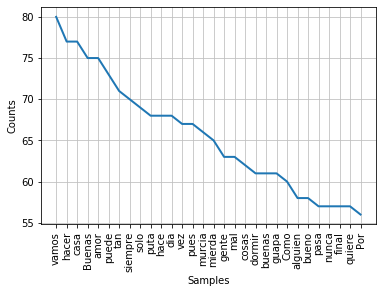

In [201]:
#NUBE DE PALABRAS
#Graficando la frecuencia
frecuencia2.plot(30,cumulative=False)

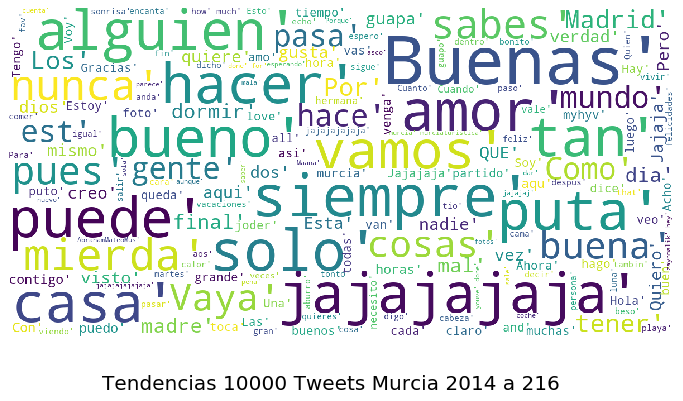

In [207]:
#NUBE DE PALABRAS 
#https://stackoverrun.com/es/q/4526646
##Creando la nube
from wordcloud import WordCloud

def show_wordcloud(data, title = "Tendencias 10000 Tweets Murcia 2014 a 216"): 
    wordcloud = WordCloud(
     background_color='white', 
     stopwords=spanish_stopwords, 
     max_words=200, 
     max_font_size=40, 
     scale=3, 
     random_state=1 # chosen at random by flipping a coin; it was heads 
        
    ).generate(str(data)) 

    fig = plt.figure(1, figsize=(12, 12)) 
    plt.axis('off') 
    if title: 
     fig.suptitle(title, fontsize=20) 
     fig.subplots_adjust(top=2.3) 

    plt.imshow(wordcloud) 
    plt.show() 

show_wordcloud(palabras2) 

In [54]:
#Metemos los datos al modelo, a diferenia del anterior hubo que agreagar al final astype str
tweets_test['polarity'] = pipeline.predict(tweets_test.tweet.astype(str))

In [55]:
tweets_test.head()

,_id,lat,lon,timestamp,tweet,user,polarity
0,5d1b8c3a5923dbcca28bd256,37.9774,-1.063,Tue Apr 15 02:23:01 +0000 2014,Ahora mismo si tuviese una pistola me pegaba un tiro sin pensarlo.,@AlexLuna_72,0
1,5d1b8c3a5923dbcca28bd257,,,Tue Apr 15 02:23:22 +0000 2014,Hola. Visto 05:36. Ms que Visto 05:38. Ignorado 05:41. No le importas 5:58.,@Gissell_Tytta,1
2,5d1b8c3a5923dbcca28bd258,37.9798,-1.06197,Tue Apr 15 02:23:32 +0000 2014,Buenas noches a todos... Fav ;) juju,@69Rikifriki,1
3,5d1b8c3a5923dbcca28bd259,,,Tue Apr 15 02:24:44 +0000 2014,JAJAJA,@Gissell_Tytta,1
4,5d1b8c3a5923dbcca28bd25a,38.0688,-1.19224,Tue Apr 15 02:25:22 +0000 2014,Salimos para a corua :),@AndreaGalian,1


In [56]:
#Cantidad de positivos y negativos SVM
EstimadosSVM = tweets_test_kNN.polarity.value_counts(normalize=True)
EstimadosSVM

1    0.7654
0    0.2346
Name: polarity, dtype: float64

Text(0.5, 1.0, 'SVM Polaridad de Tweets')

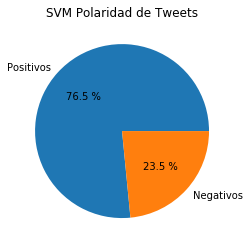

In [57]:
#Realizaremos gráfico de tortas SVM
import matplotlib.pyplot as plt
import numpy as np


plt.ion()  # Ponemos el modo interactivo
pol = [EstimadosSVM.get_values()[0]*100,EstimadosSVM.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'SVM Polaridad de Tweets')

In [58]:
#### Análisis de datos con kNN #####
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(tweets_corpus.content)
y_train=tweets_corpus['polarity_bin']
# Clustering the document with KNN classifier
modelknn = KNeighborsClassifier(n_neighbors=10)
modelknn.fit(X,y_train)


#Cargar textos para el analisis vector Test

tweets_test_kNN['tweet'] = tweets_test_kNN['tweet'].fillna(' ')

Test = vectorizer.transform(tweets_test_kNN.tweet.astype(str))
predicted_labels_knn = modelknn.predict(Test)

tweets_test_kNN['polarity'] = predicted_labels_knn

In [59]:
#Almacenar datos de resultados en una colección de Mongo llamada "sentimientos"
#collection2=db.sentimientos
#collection2.insert_many(tweets_test.to_dict('records'))

In [60]:
tweets_test_kNN.head(10)

,_id,lat,lon,timestamp,tweet,user,polarity
0,5d1b8c3a5923dbcca28bd256,37.9774,-1.063,Tue Apr 15 02:23:01 +0000 2014,Ahora mismo si tuviese una pistola me pegaba un tiro sin pensarlo.,@AlexLuna_72,0
1,5d1b8c3a5923dbcca28bd257,,,Tue Apr 15 02:23:22 +0000 2014,Hola. Visto 05:36. Ms que Visto 05:38. Ignorado 05:41. No le importas 5:58.,@Gissell_Tytta,0
2,5d1b8c3a5923dbcca28bd258,37.9798,-1.06197,Tue Apr 15 02:23:32 +0000 2014,Buenas noches a todos... Fav ;) juju,@69Rikifriki,1
3,5d1b8c3a5923dbcca28bd259,,,Tue Apr 15 02:24:44 +0000 2014,JAJAJA,@Gissell_Tytta,0
4,5d1b8c3a5923dbcca28bd25a,38.0688,-1.19224,Tue Apr 15 02:25:22 +0000 2014,Salimos para a corua :),@AndreaGalian,1
5,5d1b8c3a5923dbcca28bd25b,37.974,-1.0683,Tue Apr 15 02:25:36 +0000 2014,No va desencaminado!! #MundialBrasil2014 http://t.co/yhDfeN3Z6k,@Fran_pardotomas,0
6,5d1b8c3a5923dbcca28bd25c,,,Tue Apr 15 02:25:50 +0000 2014,@Maikykrmusic Te quiero mucho mucho mi vida &lt;3,@Gissell_Tytta,1
7,5d1b8c3a5923dbcca28bd25d,,,Tue Apr 15 02:26:07 +0000 2014,Oh maana tengo Edu.Fisica,@daniel_sotoo,1
8,5d1b8c3a5923dbcca28bd25e,37.9798,-1.06197,Tue Apr 15 02:26:28 +0000 2014,"@AlexLuna_72 calla, alexis primo dejate las tonterias que todo pasa y vienen cosas mejores Buenas noches manico",@69Rikifriki,1
9,5d1b8c3a5923dbcca28bd25f,,,Tue Apr 15 02:28:41 +0000 2014,@dayi_9926 fback cute acc,@whomaktub,1


In [61]:
#Cantidad de positivos y negativos SVM
EstimadosKNN = tweets_test_kNN.polarity.value_counts(normalize=True)
EstimadosKNN

1    0.6936
0    0.3064
Name: polarity, dtype: float64

Text(0.5, 1.0, 'kNN Polaridad de Tweets')

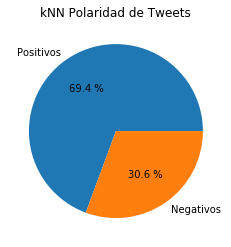

In [62]:
#Realizaremos gráfico de tortas kNN
import matplotlib.pyplot as plt
import numpy as np


plt.ion()  # Ponemos el modo interactivo
pol = [EstimadosKNN.get_values()[0]*100,EstimadosKNN.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'kNN Polaridad de Tweets')

In [63]:
#Crear archivos de excel con los resultados de sentimientos
tweets_test.to_excel(r'sentimientosSVM_tweets.xlsx')
tweets_test_kNN.to_excel(r'sentimientosKNN_tweets.xlsx')

In [64]:
# Almacenar en dos bases de datos en MongoDB una para SVM y otra para kNN
#Almacenar datos en una colección de Mongo
collist = db.list_collection_names()

## ALMACENAR RESULTADOS SVM ###
if "sentimientosSVM" in collist:
 db.sentimientosSVM.drop()   
 db.sentimientosSVM.insert_many(tweets_test.to_dict('records'))
else:
    db["sentimientosSVM"]
    db.sentimientosSVM.insert_many(tweets_test.to_dict('records'))

In [65]:
## ALMACENAR RESULTADOS SVM ###
if "sentimientosKNN" in collist:
 db.sentimientosKNN.drop()   
 db.sentimientosKNN.insert_many(tweets_test_kNN.to_dict('records'))
else:
    db["sentimientosKNN"]
    db.sentimientosKNN.insert_many(tweets_test_kNN.to_dict('records'))